In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#lab settings
T_amb = 20.5 #C
P_amb = 655.9 #mmHg
T_amb = T_amb + 273.15 #K
P_amb = P_amb * 133.32 #N/m2 = Pa
comp_ratio = 7 #V_bdc/V_tdc
bore = 65.1 #mm
stroke = 44.4 #mm
timing = 20 #deg pre TDC
throttle = 100 #percent of open

# combustion test: performance
dt = np.array([21.07, 20.37, 41.53, 44.40, 53.46]) #s
omega_rpm = np.array([3015, 2753, 2485, 2248, 1990]) #rpm
tau = np.array([2.56, 3.07, 3.15, 3.20, 3.01]) #Nm
vdot_fuel = np.array([5.1, 5.1, 10.2, 10.2, 10.2]) #cm3
vdot_air = np.array([167, 165, 163, 160, 149]) #L/min , at t = 0, v_air = 5
T_air = np.array([18.7, 18.8, 18.8, 18.8, 18.8]) #C
T_fuel = np.array([21.0, 21.2, 21.4, 21.1, 21.6]) #C
T_exh = np.array([526, 502, 491, 472, 458]) #C
T_exh = T_exh + 273.15 #K

# dry run test: mechanical losses
omega_dr_rpm = np.array([3023, 2753, 2506, 2254, 1999]) #rpm
tau_dr = np.array([2.175, 2.00, 1.85, 1.81, 1.75]) #Nm


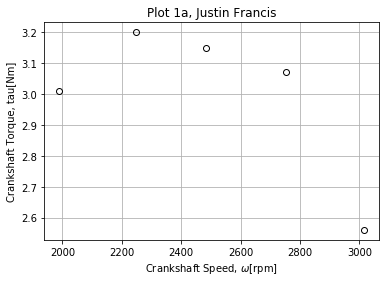

In [86]:
# fig 1a 
plt.figure(1)
plt.plot(omega_rpm, tau, 'o', color='k', fillstyle='none')
plt.ylabel('Crankshaft Torque, tau[Nm]')
plt.xlabel('Crankshaft Speed, $\omega$[rpm]')
plt.title('Plot 1a, Justin Francis')
plt.grid()
plt.savefig('Fig1a.png', dpi=800)
plt.show()


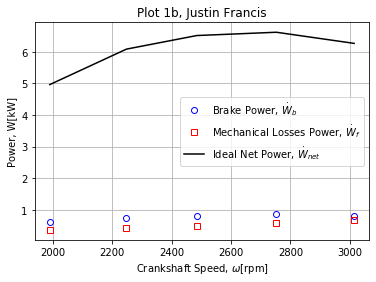

In [87]:
# fig 1b 
#unit conversion
omega = (omega_rpm * 2*np.pi)/60 #rad/s
omega_dr = (omega_dr_rpm * 2*np.pi)/60 #rad/s
#find power associated with performance and mechanical losses
brake_pow = tau * omega #W
dry_pow = tau_dr * omega_dr #W
#find total power in fuel used
LHV = 44.0 #MJ/kg
rho_fuel = 726.0 #kg/m3
mdot_fuel = rho_fuel * (v_fuel*100**(-3))/dt #kg/s
fuel_pow = mdot_fuel * LHV*1e6 #W
#find total heat loss of ideal engine
Cv_air = 1005 #J/kgK
R_air = 287.058 #J/kgK
rho_air = ((R_air*T_amb)/P_amb)**(-1) #kg/m3
mdot_air = rho_air * (vdot_air/(60*1e3))
Qdot_out = mdot_air * Cv_air * (T_exh - T_amb)
pow_net = fuel_pow - Qdot_out

plt.figure(2)
plt.plot(omega_rpm, brake_pow*1e-3, 'o', color='b', fillstyle='none', label='Brake Power, $\dot{W}_b$')
plt.plot(omega_rpm, dry_pow*1e-3, 's', color='r', fillstyle='none', label='Mechanical Losses Power, $\dot{W}_f$')
plt.plot(omega_rpm, pow_net*1e-3, color='k', fillstyle='none', label='Ideal Net Power, $\dot{W}_{net}$')
plt.ylabel('Power, W[kW]')
plt.xlabel('Crankshaft Speed, $\omega$[rpm]')
plt.title('Plot 1b, Justin Francis')
plt.grid()
plt.legend()
plt.savefig('Fig1b.png', dpi=800)
plt.show()

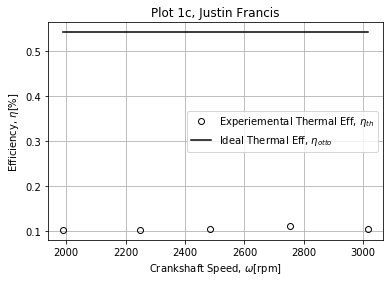

In [98]:
# fig 1c
#thermal efficiency
eta_th = brake_pow/fuel_pow
#ideal thermal efficiency
k_air = 1.4
eta_otto = 1 - (1/(comp_ratio**(k_air-1)))


plt.figure(3)
plt.plot(omega_rpm, eta_th, 'o', color='k', fillstyle='none', label='Experiemental Thermal Eff, $\eta_{th}$')
plt.plot([min(omega_rpm), max(omega_rpm)], [eta_otto, eta_otto], color='k', label='Ideal Thermal Eff, $\eta_{otto}$')
plt.ylabel('Efficiency, $\eta$[%]')
plt.xlabel('Crankshaft Speed, $\omega$[rpm]')
plt.title('Plot 1c, Justin Francis')
plt.grid()
plt.legend()
plt.savefig('Fig1c.png', dpi=800)
plt.show()

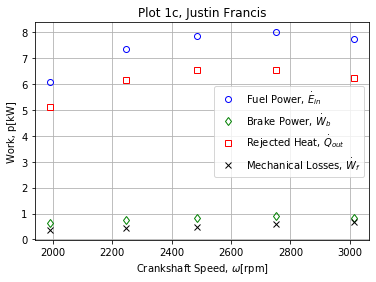

In [89]:
# fig 1d
#find heat rejected to surroundings
Qdot_out = fuel_pow - (brake_pow + dry_pow) #W

plt.figure(4)
plt.plot(omega_rpm, fuel_pow*1e-3, 'o', color='b', fillstyle='none', label='Fuel Power, $\dot{E}_{in}$')
plt.plot(omega_rpm, brake_pow*1e-3, 'd', color='g', fillstyle='none', label='Brake Power, $\dot{W}_{b}$')
plt.plot(omega_rpm, Qdot_out*1e-3, 's', color='r', fillstyle='none', label='Rejected Heat, $\dot{Q}_{out}$')
plt.plot(omega_rpm, dry_pow*1e-3, 'x', color='k', fillstyle='none', label='Mechanical Losses, $\dot{W}_{f}$')
plt.ylabel('Work, p[kW]')
plt.xlabel('Crankshaft Speed, $\omega$[rpm]')
plt.title('Plot 1c, Justin Francis')
plt.grid()
plt.legend()
plt.savefig('Fig1d.png', dpi=800)
plt.show()

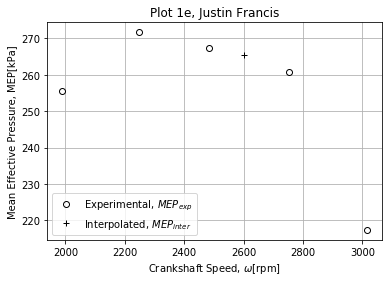

In [90]:
# fig 1e
#find mean effective pressure
nc = 2 #4 stroke engine
Vd = 0.148 #L
MEP = (tau*2*np.pi*nc)/(Vd*1e-3) #Pa
#find MEP at 2600 rpm
MEP_2600 = MEP[2]+(2600-omega_rpm[2])*((MEP[3]-MEP[2])/(omega_rpm[3]-omega_rpm[2])) #Pa

plt.figure(5)
plt.plot(omega_rpm, MEP*1e-3, 'o', color='k', fillstyle='none', label='Experimental, $MEP_{exp}$')
plt.plot(2600, MEP_2600*1e-3, '+', color='k', fillstyle='none', label='Interpolated, $MEP_{inter}$')
plt.ylabel('Mean Effective Pressure, MEP[kPa]')
plt.xlabel('Crankshaft Speed, $\omega$[rpm]')
plt.title('Plot 1e, Justin Francis')
plt.grid()
plt.legend()
plt.savefig('Fig1e.png', dpi=800)
plt.show()

In [97]:
#short answer
print("2a1: " , np.mean(brake_pow/fuel_pow))
print("2a2: " , np.mean(dry_pow/fuel_pow))
print("2a3: " , np.mean(Qdot_out/fuel_pow))

2a1:  0.10504978878591405
2a2:  0.06826945369424499
2a3:  0.8266807575198409


In [102]:
print("2b1: ", np.mean(brake_pow/(brake_pow + dry_pow)))
print("2b2: ", np.mean((eta_otto-eta_th)/eta_otto))

2b1:  0.608593201745483
2b2:  0.8057667356828768


In [111]:
print("2c: ", MEP_2600*((bore*1e-3)/2)**2*np.pi, "[N] =", MEP_2600*((bore*1e-3)/2)**2*np.pi*0.224809, "[lbs]") #Pa*m^2 = N

2c:  883.3903174573838 [N] = 198.594093877277 [lbs]
